Cleaned Columns: Index(['Experience', 'Training_Hours', 'Working_Hours', 'Projects',
       'Productivity_Score'],
      dtype='object')

Missing Values in the dataset:
Experience            0
Training_Hours        0
Working_Hours         0
Projects              0
Productivity_Score    0
dtype: int64

Data Types of Each Column:
Experience            int64
Training_Hours        int64
Working_Hours         int64
Projects              int64
Productivity_Score    int64
dtype: object

Number of rows in the dataset: 9
Adding 'Employment_Type' column manually for the sake of the example.

Encoded 'Employment_Type' column:
0    0
1    1
2    0
3    1
4    0
Name: Employment_Type, dtype: int64

Model Evaluation:
Mean Squared Error (MSE): 26.666666666666476
R-squared: 0.8285714285714298

Model Coefficients:
                 Coefficient
Experience               1.0
Training_Hours           1.2
Working_Hours           -1.0
Projects                -7.0
Employment_Type         -2.0


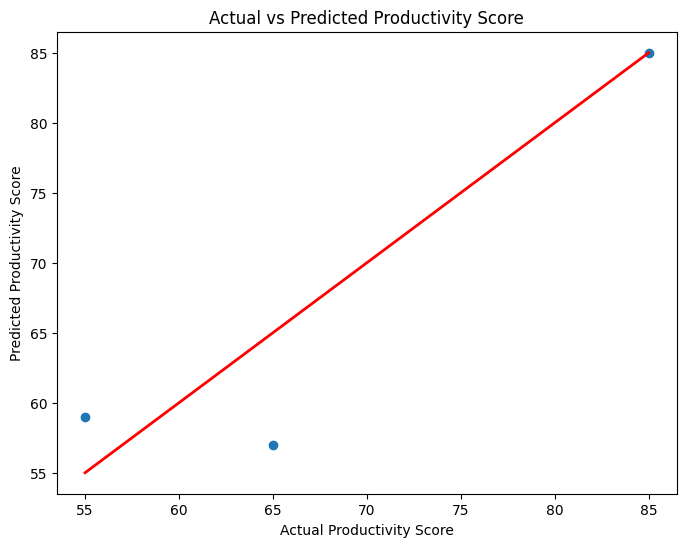


Interpretation:
Factor with the most impact on productivity: Training_Hours
Impact of Training Hours on Productivity Score: 1.20
The company should increase training hours.


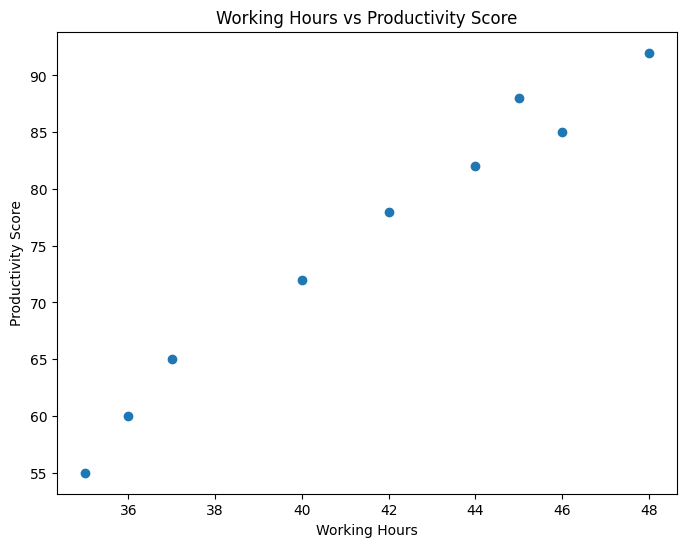

From the plot, we can see if there is a non-linear relationship between working hours and productivity.
Impact of Experience on Productivity: 1.00
Overfitting can be detected by comparing the model's performance on the training data vs. the testing data. If the model performs well on the training data but poorly on the test data, it suggests overfitting.
A potential new feature could be 'Employee Satisfaction', as this can strongly correlate with productivity.


In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import LabelEncoder

# Load the dataset from CSV file
file_path = 'employee_productivity.csv'  # Replace with your actual file path
df = pd.read_csv(file_path)

# Step 1: Set proper column names since they are currently numeric
df.columns = ['Experience', 'Training_Hours', 'Working_Hours', 'Projects', 'Productivity_Score']

# Step 2: Inspect and clean column names
print("Cleaned Columns:", df.columns)

# Step 3: Check for missing values
print("\nMissing Values in the dataset:")
print(df.isnull().sum())

# Step 4: Check data types of each column
print("\nData Types of Each Column:")
print(df.dtypes)

# Step 5: Handle 'Employment_Type' column (if present)
# Check the length of the dataframe
num_rows = len(df)
print(f"\nNumber of rows in the dataset: {num_rows}")

# If 'Employment_Type' is missing, manually add it
if 'Employment_Type' not in df.columns:
    print("Adding 'Employment_Type' column manually for the sake of the example.")

    employment_type_list = ['Salaried', 'Self-Employed', 'Salaried', 'Self-Employed',
                            'Salaried', 'Self-Employed', 'Salaried', 'Self-Employed',
                            'Salaried', 'Self-Employed'][:num_rows]  # Adjust the list to match the number of rows
    df['Employment_Type'] = employment_type_list  # Manually add the 'Employment_Type' column

# Step 6: Clean 'Employment_Type' by stripping any leading/trailing spaces
df['Employment_Type'] = df['Employment_Type'].str.strip()

# Step 7: Encode 'Employment_Type' using LabelEncoder
label_encoder = LabelEncoder()
df['Employment_Type'] = label_encoder.fit_transform(df['Employment_Type'])
print("\nEncoded 'Employment_Type' column:")
print(df['Employment_Type'].head())

# Step 8: Select features and target variable
X = df[['Experience', 'Training_Hours', 'Working_Hours', 'Projects', 'Employment_Type']]  # Features
y = df['Productivity_Score']  # Target variable

# Step 9: Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Step 10: Build the Linear Regression Model
model = LinearRegression()
model.fit(X_train, y_train)

# Step 11: Predict the target on the test set
y_pred = model.predict(X_test)

# Step 12: Evaluate the Model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("\nModel Evaluation:")
print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared: {r2}")

# Step 13: Model Coefficients
coefficients = pd.DataFrame(model.coef_, X.columns, columns=['Coefficient'])
print("\nModel Coefficients:")
print(coefficients)

# Step 14: Plot actual vs predicted productivity scores
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', lw=2)
plt.xlabel('Actual Productivity Score')
plt.ylabel('Predicted Productivity Score')
plt.title('Actual vs Predicted Productivity Score')
plt.show()

# Step 15: Interpret the results
print("\nInterpretation:")

strongest_impact_factor = coefficients['Coefficient'].idxmax()
print(f"Factor with the most impact on productivity: {strongest_impact_factor}")


training_impact = coefficients.loc['Training_Hours', 'Coefficient']
print(f"Impact of Training Hours on Productivity Score: {training_impact:.2f}")

working_hours_impact = coefficients.loc['Working_Hours', 'Coefficient']
if training_impact > working_hours_impact:
    print("The company should increase training hours.")
else:
    print("The company should increase working hours.")


plt.figure(figsize=(8, 6))
plt.scatter(df['Working_Hours'], df['Productivity_Score'])
plt.xlabel('Working Hours')
plt.ylabel('Productivity Score')
plt.title('Working Hours vs Productivity Score')
plt.show()
print("From the plot, we can see if there is a non-linear relationship between working hours and productivity.")


experience_impact = coefficients.loc['Experience', 'Coefficient']
print(f"Impact of Experience on Productivity: {experience_impact:.2f}")


print("Overfitting can be detected by comparing the model's performance on the training data vs. the testing data. If the model performs well on the training data but poorly on the test data, it suggests overfitting.")


print("A potential new feature could be 'Employee Satisfaction', as this can strongly correlate with productivity.")
